In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Limpieza previa del DataSet para la realización de las diferentes visualizaciones gráficas.

In [27]:
precios_alquiler=pd.read_csv('preu lloguer per trimestre i barri.csv')
precios_alquiler

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


La tabla ya indica que el dataset se compone de 584 filas y 8 columnas. Ahora será necesario un análisis del tipo de datos que contiene y valorar su modificación para la eficacia en el momento de crear los gráficos y analizarlos. (Son pocas las columnas, solo 8, por lo que no será necesario la eliminación de ninguna para una mejor manipulación del dataset).

In [28]:
# Tipo de datos de cada variable o columna
precios_alquiler.dtypes

Any                int64
Trimestre          int64
Codi_Districte     int64
Nom_Districte     object
Codi_Barri         int64
Nom_Barri         object
Lloguer_mitja     object
Preu              object
dtype: object

In [29]:
# Existencia o no de valores nulos por cada columna
precios_alquiler.isnull().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

Con estas dos informaciones se puede observar que la columna 'Preu' ("piedra angular" del DataSet) no contiene valores nulos (igual que el resto de columnas), pero están registrados como valores objeto, por lo que vamos a convertirlos en numéricos para poder operar con ellos. Antes de este cambio, será necesario comprobar si existen argumentos no válidos para su conversión a valores numéricos.

In [30]:
# Comprobación de la existencia de valores no convetibles a numéricos mediante ordenación de la columna 'Preu'

precios_alquiler[['Lloguer_mitja', 'Preu']].drop_duplicates().sort_values(by='Preu').head(10) 

,Lloguer_mitja,Preu
84,Lloguer mitjà per superfície (Euros/m2 mes),--
11,Lloguer mitjà mensual (Euros/mes),--
413,Lloguer mitjà per superfície (Euros/m2 mes),10.0
266,Lloguer mitjà per superfície (Euros/m2 mes),10.1
257,Lloguer mitjà per superfície (Euros/m2 mes),10.2
111,Lloguer mitjà per superfície (Euros/m2 mes),10.4
129,Lloguer mitjà per superfície (Euros/m2 mes),10.7
231,Lloguer mitjà per superfície (Euros/m2 mes),10.8
131,Lloguer mitjà per superfície (Euros/m2 mes),10.9
318,Lloguer mitjà mensual (Euros/mes),1004.7


Existe el valor '--', motivo por el cual no será posible la conversión al tipo de dato numérico de forma directa con la función '.astype'. Por ello emplearemos la función 'pd.to_numeric' y con el añadido 'coerce', así los argumentos no válidos serán registrados como NaN

In [31]:
precios_alquiler['Preu'] = pd.to_numeric(precios_alquiler['Preu'],errors = 'coerce')

In [32]:
# Observamos la cantidad de nulos existentes ahora en la columna 'Preu'.

precios_alquiler['Preu'].isnull().sum() 

44

In [33]:
# Se confirma el cambio a tipo numérico de la columna, aunque ahora con 44 valores nulos.

precios_alquiler.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


En este punto hay que valorar qué hacer con estos datos nulos. Si al eliminar las filas pertenecientes a los valores nulos se está eliminando a la vez la existencia de valores únicos de otras variables o columnas, entonces no será procedente, ya que se  estará limitando la manipulación estadística y gráfica por no disponer ya de aquellos valores.

In [34]:
# En primer lugar, se comprueba el número de valores únicos por columna

precios_alquiler.nunique()  

Any                 1
Trimestre           4
Codi_Districte     10
Nom_Districte      10
Codi_Barri         73
Nom_Barri          73
Lloguer_mitja       2
Preu              330
dtype: int64

In [35]:
#Ahora se hace una comparativa eliminando los valores nulos

alquil_sin_Nan=precios_alquiler.dropna() 
alquil_sin_Nan.nunique()

Any                 1
Trimestre           4
Codi_Districte     10
Nom_Districte      10
Codi_Barri         68
Nom_Barri          68
Lloguer_mitja       2
Preu              330
dtype: int64

In [36]:
# Comprobación de los úicos Distritos que contienen Barrios con valores nulos en sus precios medios de alquiler

precios_alquiler[precios_alquiler['Preu'].isnull()]['Nom_Districte'].unique() 

array(['Sants-Montjuïc', 'Horta-Guinardó', 'Nou Barris', 'Sant Andreu'],
      dtype=object)

Se puede observar que al eliminar los valores NaN, también se están eliminando 5 barrios ('Nom_Barri', así como su respectivo 'Codi_Barri'), los cuales ya no constarán en el dataset, infiriendo así en varias formas de análisis que se quiera realizar.
Se descarta entonces su eliminación. Por esta razón, lo más conveniente sería la sustitución por interpolación, afectando prácticamente en absoluto a las valores estadísticos que puedan extraerse. Se hará la comparativa estadística de los precios por Distrito, que afectarán unicamente a 4 de ellos, los de 'Sants-Montjuïc', 'Horta-Guinardó', 'Nou Barris' y 'Sant Andreu'.

In [37]:
# Descripción estadística antes de aplicar la interpolación.

precios_alquiler.groupby(['Lloguer_mitja','Nom_Districte'])['Preu'].describe().sort_values(by='mean').round(2) 

count  \
Lloguer_mitja                               Nom_Districte                
Lloguer mitjà per superfície (Euros/m2 mes) Nou Barris            40.0   
                                            Sant Andreu           26.0   
                                            Horta-Guinardó        40.0   
                                            Sants-Montjuïc        28.0   
                                            Eixample              24.0   
                                            Gràcia                20.0   
                                            Sant Martí            40.0   
                                            Ciutat Vella          16.0   
                                            Les Corts             12.0   
                                            Sarrià-Sant Gervasi   24.0   
Lloguer mitjà mensual (Euros/mes)           Nou Barris            40.0   
                                            Sant Andreu           26.0   
                                            Horta-Guinardó        40.0   
                                            Sants-Montjuïc        28.0   
                                            Ciutat Vella          16.0   
                                            Gràcia                20.0   
                                            Sant Martí            40.0   
                                            Eixample              24.0   
                                            Les Corts             12.0   
                                            Sarrià-Sant Gervasi   24.0   

                                                                    mean  \
Lloguer_mitja                               Nom_Districte                  
Lloguer mitjà per superfície (Euros/m2 mes) Nou Barris             10.92   
                                            Sant Andreu            11.15   
                                            Horta-Guinardó         11.99   
                                            Sants-Montjuïc         12.68   
                                            Eixample               13.30   
                                            Gràcia                 13.38   
                                            Sant Martí             13.44   
                                            Ciutat Vella           13.78   
                                            Les Corts              14.01   
                                            Sarrià-Sant Gervasi    15.01   
Lloguer mitjà mensual (Euros/mes)           Nou Barris            664.29   
                                            Sant Andreu           721.20   
                                            Horta-Guinardó        765.01   
                                            Sants-Montjuïc        798.93   
                                            Ciutat Vella          858.92   
                                            Gràcia                877.26   
                                            Sant Martí            916.45   
                                            Eixample             1000.55   
                                            Les Corts            1214.07   
                                            Sarrià-Sant Gervasi  1271.21   

                                                                    std  \
Lloguer_mitja                               Nom_Districte                 
Lloguer mitjà per superfície (Euros/m2 mes) Nou Barris             1.16   
                                            Sant Andreu            1.22   
                                            Horta-Guinardó         0.81   
                                            Sants-Montjuïc         0.95   
                                            Eixample               0.35   
                                            Gràcia                 0.66   
                                            Sant Martí             1.86   
                                            Ciutat Vella           1.42   
             

In [38]:
# Se aplica la interpolación, fijándola en el DataSet.

precios_alquiler.interpolate(inplace=True)

In [39]:
# Ahora se realiza una nueva descripción estadística después de haber aplicado la interpolación

precios_alquiler.groupby(['Lloguer_mitja','Nom_Districte'])['Preu'].describe().sort_values(by='mean').round(2)

count  \
Lloguer_mitja                               Nom_Districte                
Lloguer mitjà per superfície (Euros/m2 mes) Nou Barris            52.0   
                                            Sant Andreu           28.0   
                                            Horta-Guinardó        44.0   
                                            Sants-Montjuïc        32.0   
                                            Eixample              24.0   
                                            Gràcia                20.0   
                                            Sant Martí            40.0   
                                            Ciutat Vella          16.0   
                                            Les Corts             12.0   
                                            Sarrià-Sant Gervasi   24.0   
Lloguer mitjà mensual (Euros/mes)           Nou Barris            52.0   
                                            Sant Andreu           28.0   
                                            Horta-Guinardó        44.0   
                                            Sants-Montjuïc        32.0   
                                            Ciutat Vella          16.0   
                                            Gràcia                20.0   
                                            Sant Martí            40.0   
                                            Eixample              24.0   
                                            Les Corts             12.0   
                                            Sarrià-Sant Gervasi   24.0   

                                                                    mean  \
Lloguer_mitja                               Nom_Districte                  
Lloguer mitjà per superfície (Euros/m2 mes) Nou Barris             10.74   
                                            Sant Andreu            11.11   
                                            Horta-Guinardó         12.02   
                                            Sants-Montjuïc         12.61   
                                            Eixample               13.30   
                                            Gràcia                 13.38   
                                            Sant Martí             13.44   
                                            Ciutat Vella           13.78   
                                            Les Corts              14.01   
                                            Sarrià-Sant Gervasi    15.01   
Lloguer mitjà mensual (Euros/mes)           Nou Barris            649.90   
                                            Sant Andreu           714.56   
                                            Horta-Guinardó        768.71   
                                            Sants-Montjuïc        794.28   
                                            Ciutat Vella          858.92   
                                            Gràcia                877.26   
                                            Sant Martí            916.45   
                                            Eixample             1000.55   
                                            Les Corts            1214.07   
                                            Sarrià-Sant Gervasi  1271.21   

                                                                    std  \
Lloguer_mitja                               Nom_Districte                 
Lloguer mitjà per superfície (Euros/m2 mes) Nou Barris             1.09   
                                            Sant Andreu            1.19   
                                            Horta-Guinardó         0.78   
                                            Sants-Montjuïc         0.91   
                                            Eixample               0.35   
                                            Gràcia                 0.66   
                                            Sant Martí             1.86   
                                            Ciutat Vella           1.42   
             

La alteración estadística con la aplicación de la función 'interpolate' es prácticamente inexistente. Por ejemplo, el precio medio por m2 del Distrito de Sant Andreu antes de la aplicación de la interpolación era de 11.15 euros, y una vez aplicada es de 11.11 euros, manteniéndose siempre los mínimos y máximos de cada Distrito.

Añadiendo información estadística, el Distrito donde los precios medios son más bajos es Nou Barris (10.74€ por m2 o 649.90€ por domicilio), mientras que el más alto es Sarrià-Sant Gervasi (15.01€ por m2 o 1271.21€ por domicilio).
En cuanto a los precios por domicilio, es en el distrito de Les Corts donde hay mayor disparidad de precios en atención a su desviación estándar, casi el doble que el segundo (Sarrià-Sant Gervasi). Probablemente el motivo se deba a la existencia de considerables diferencias en las dimensiones de los domicilios (pero se carecen de estos datos), ya que si se observa la desviación estándar de los precios por m2, estos son más homogéneos, auqnue destacando el Eixample por ser el que tiene el mínimo valor (casi la mitad del penúltimo). Por su parte, el que tiene mayor variación en los precios por m2 es Sant Martí. 

La anterior tabla estadística agrupada, permite ver que existen dos formatos de precios, el de 'Lloguer mitjà mensual (Euros/mes)' y el de 'Lloguer mitjà per superfície (Euros/m2 mes)'. A causa de ello, será necesario la creación de dos dataframes para su manipulación, "alquiler_renta" y "alquiler_m2", respectivamente

In [40]:
# Creación de los dos dataframes mencionados

alquiler_renta = precios_alquiler.loc[precios_alquiler['Lloguer_mitja']== 'Lloguer mitjà mensual (Euros/mes)']
alquiler_m2 = precios_alquiler.loc[precios_alquiler['Lloguer_mitja']== 'Lloguer mitjà per superfície (Euros/m2 mes)']


# Ejercicio 1. Resumen estadístico y gráfico de un DataSet

### Una vez realizada la limpieza y hecho el análisis estadístico del DataSet, es posible realizar las respectivas Visualizaciones Gráficas

### Variable categórica: Distritos

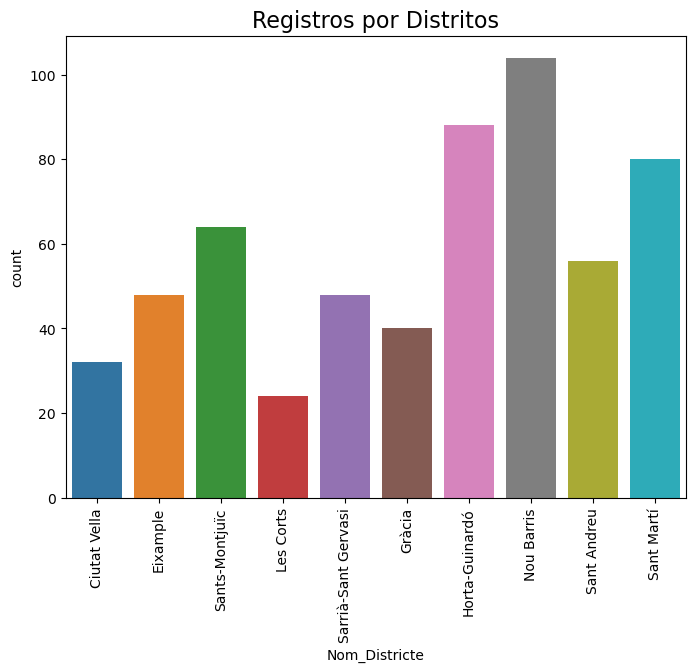

In [41]:
plt.figure(figsize = (8,6))

sns.countplot(x='Nom_Districte', data=precios_alquiler)
plt.xticks(rotation=90)
plt.title('Registros por Distritos', fontsize=16)


plt.savefig('Registros por Distritos', bbox_inches='tight') # Guarda el gráfico en imagen para el Ejercicio 2

Es el Distrito de Nou Barris el que más registros contempla el dataSet (por encima de los 100), mientras que el de Les Corts el que menos (poco más de 20).

### Variable numérica: Precio

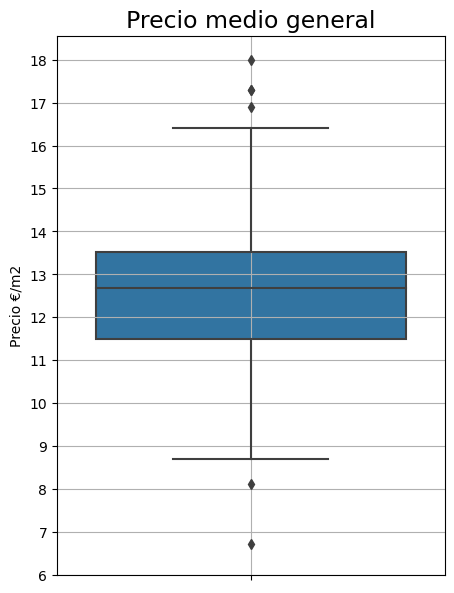

In [42]:
plt.figure(figsize = (5,7))

sns.boxplot( data=alquiler_m2, y="Preu")

plt.yticks(np.arange(6, 19, 1))
plt.grid()
plt.title('Precio medio general', fontsize=17)
plt.ylabel('Precio €/m2')



plt.savefig('Precio medio general', bbox_inches='tight') # Guarda el gráfico en imagen para el Ejercicio 2

Con respecto a los precios medios por m2, estos se concentran entre los casi 9€ y los poco más de 16€. La mediana de los precios está alrededor de los 12,7€, y el 25% de los precios está concentrado hasta los 11.5€, así como el 75% hasta los 13,5€.
En el gráfico de caja, puede observarse varios datos atípicos (los puntos en diamante), son los denominados 'outliers', es decir, son valores que están considerados fuera del rango normal de precios.

### Variable numérica y categórica: Distrito y Precio

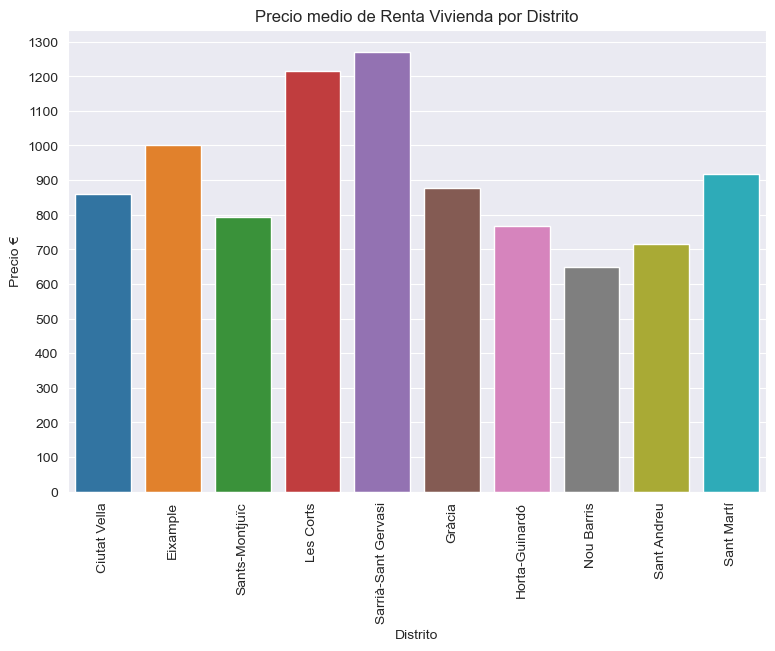

In [43]:
plt.figure(figsize=(9, 6))
sns.set_style("darkgrid")

sns.barplot(data= alquiler_renta, x='Nom_Districte', y='Preu', errorbar=None)

plt.yticks(np.arange(0, 1400, 100))
plt.xticks(rotation=90)
plt.title('Precio medio de Renta Vivienda por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Precio €')


plt.savefig('Precio medio vivienda por Distrito', bbox_inches='tight') # Guarda el gráfico en imagen para el Ejercicio 2

El gráfico de barras demuestra que el distrito de Sarrià-Sant Gervasi es el que tiene el precio del alquiler de una vivienda más alto con unos 1270€, seguido muy de cerca por Les Corts con unos 1210€. En cambio, el que tiene el precio más bajo es Nou Barris, con alrededor de 640€.

## Dos variables numéricas: Trimestre y Precio

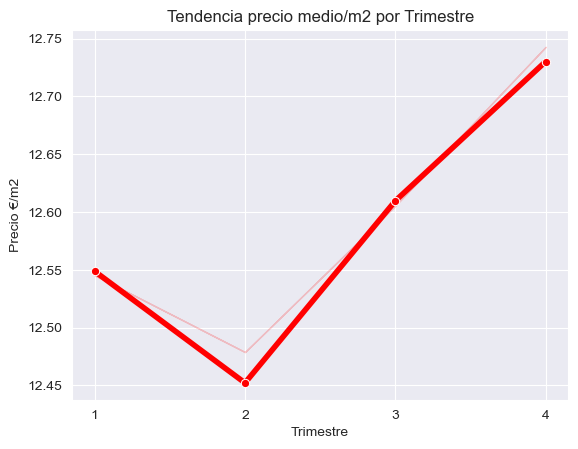

In [44]:
sns.lineplot(data = alquiler_m2, x='Trimestre', y='Preu', marker='o', color='red', linewidth=4, errorbar=('ci', False))

plt.xticks(np.arange(1, 5, 1))
plt.title('Tendencia precio medio/m2 por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Precio €/m2')


plt.savefig("Tendencia precio medio-m2 por Trimestre.png", bbox_inches='tight') # Guarda el gráfico en imagen para el Ejercicio 2

En el primer trimestre del año, el precio medio se situaba en los 12.55€, pasando a tendencia negativa en el segundo trimestre hasta llegar a los 12.45€. A partir de entonces, el ascendo es considerable, llegando en el tercer trimestre a posicionarse incluso por encima del primero, superando ahora en los 12.60€, para finalmente continuar con este impulso iniciado en el segundo trimestre y alcanzar casi los 12.8€ por m2 en el cuarto y último trimestre del año.

## Tres variables: Distrito, Trimestre y Precio

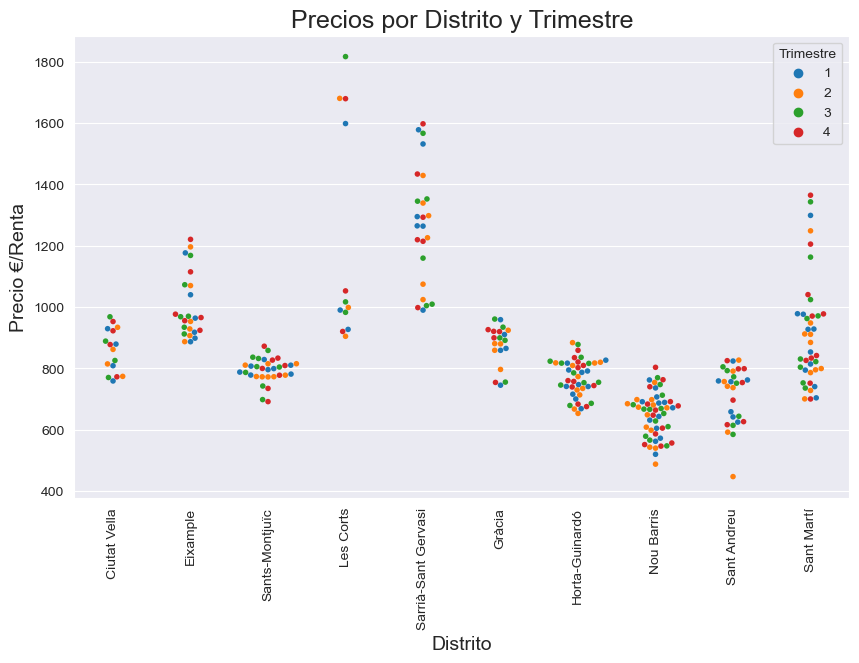

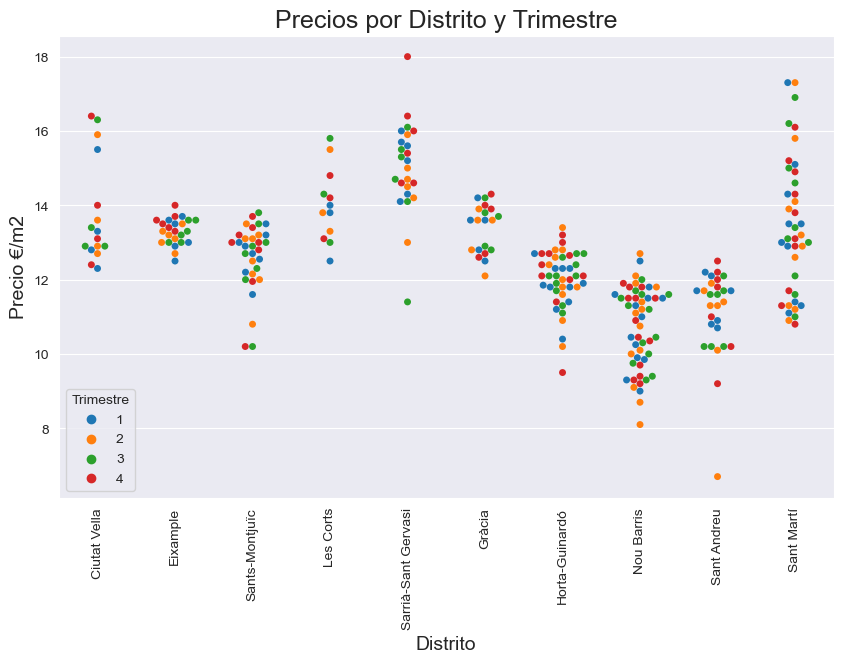

In [45]:
plt.figure(figsize = (10,6))

sns.swarmplot(data=alquiler_renta, x='Nom_Districte', y='Preu', hue='Trimestre', s=4, palette='tab10')
plt.xticks(rotation=90)
plt.title('Precios por Distrito y Trimestre', fontsize=18)
plt.xlabel('Distrito', fontsize=14)
plt.ylabel('Precio €/Renta', fontsize=14)



plt.figure(figsize = (10,6))
sns.swarmplot(data=alquiler_m2, x='Nom_Districte', y='Preu', hue='Trimestre', s=5, palette='tab10')
plt.xticks(rotation=90)
plt.title('Precios por Distrito y Trimestre', fontsize=18)
plt.xlabel('Distrito', fontsize=14)
plt.ylabel('Precio €/m2', fontsize=14)



plt.savefig("Precios por Distrito y Trimestre", bbox_inches='tight')# Guarda el gráfico en imagen para el Ejercicio 2

Esta visualización de tipo dispersión en modo enjambre permite contemplar los precios medios del alquiler de la vivienda para cada trimestre y distrito (tanto por precio por vivienda entera o renta como por m2, respectivamente). La gráfica permite no superponer los valores gracias a la poca cantidad de datos, de lo contrario se haría imposible este tipo de visualización.
En los precios medios por renta, destaca la alta concentración de los precios del distrito de Sants-Montjuic (entre los 680€ hasta los 880€). Mientras en Les Corts, se puede observar únicamente dos rangos de precios, uno de 900€ a 1050€ y otro de 1600€ a 1850€, entre ambos rangos no existen precios. Por otra parte, Sarrià-Sant Gervasi, presenta una alta dispersión en sus precios, que van desde los 1000€ hasta los 1600€; lo mismo en Sant Martí (entre los 690€ hasta los 1390€).
En cuanto a los precios por m2, el Distrito del Eixample es que presenta mayor concentración de sus precios medios, desde los 12.2€ hasta los 14€. En cambio, Sant Martí es el Distrito con mayor dispersión continua (sin práctimanete espacios) de sus precios, desde los 10.8€ hasta los 17.7€.

# Ejercicio 2. Exportar los gráfico como imágenes.

In [ ]:
# En cada código de los gráficos se ha guardado en imagen:
# plt.savefig('Registros por Distritos', bbox_inches='tight')
# plt.savefig('Precio medio general', bbox_inches='tight')
# plt.savefig('Precio medio vivienda por Distrito', bbox_inches='tight')
# plt.savefig("Tendencia precio medio-m2 por Trimestre.png", bbox_inches='tight')
# plt.savefig("Precios por Distrito y Trimestre", bbox_inches='tight')



# Ejercicio 3

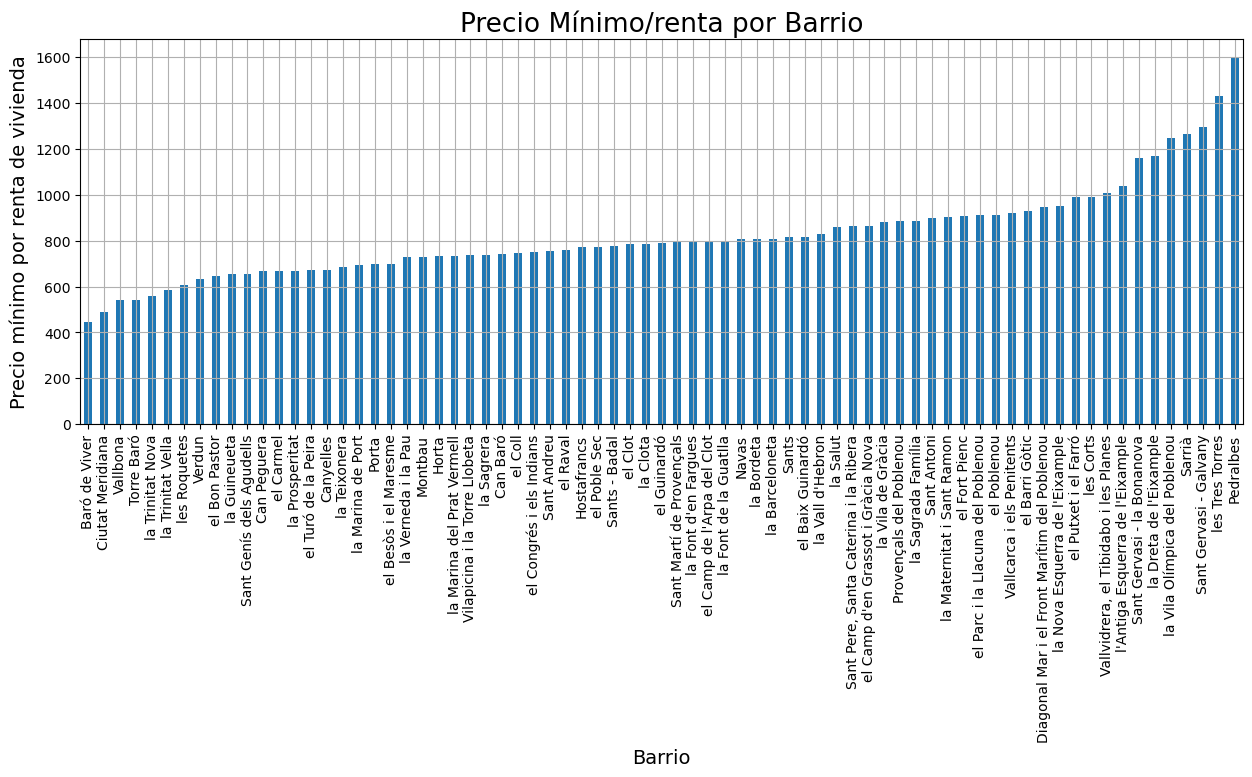

In [25]:
plt.figure(figsize=(15,5))

alquiler_renta.groupby('Nom_Barri').min('Preu').sort_values('Preu')['Preu'].plot.bar()

plt.title('Precio Mínimo/renta por Barrio', fontsize=19)
plt.grid()
plt.xlabel('Barrio', fontsize=14)
plt.ylabel('Precio mínimo por renta de vivienda', fontsize=14)

plt.show()

Este gráfico de barras nos permite visibilizar el precio mínimo por alquiler de una vivienda que hay en cada barrio, ordenados de menor a mayor para dar mejor percepción. 
Es en el barrio de Baró de Viver donde podrá hallarse la renta de la vivienda con menor precio de todos los barrios registrados de Barcelona, alrededor de los 420€. Por el contrario, Pedralbes posee la renta de la vivienda registrada en el DataSet más alta de Barcelona, con 1600€.